<a href="https://colab.research.google.com/github/thiago-amaral/covid19-analysis/blob/main/covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing COVID-19 Data in Australia

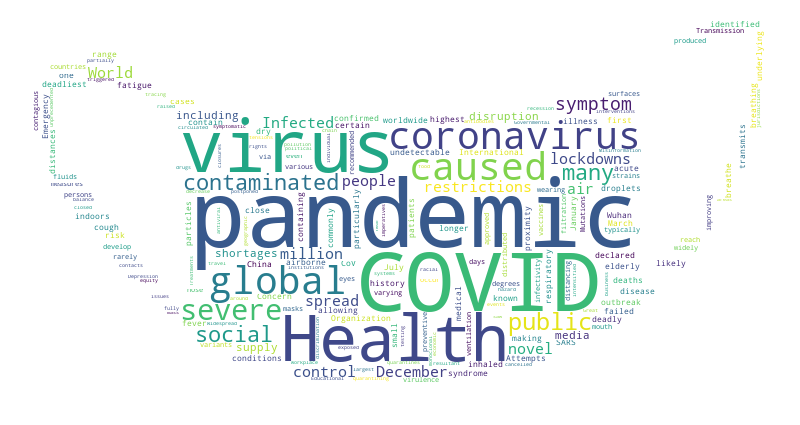

What is known as COVID-19 is an infectious disease caused by the SARS-CoV-2 virus. A pandemic of the coronavirus disease started back in 2019 and, although life is back to normal in many places, the pandemic is not officialy over yet. Some of the symptoms infected patients experience include fever, dry cough and fatigue; however, elderly patients and those with underlying medical conditions can suffer from severe illness when infected. Since the start of the outbreak mutations produced many strains/variants, some of them more infectious and deadly. This pandemic brought difficult times to everyone around the world and produced lots of data along the day, which will be analysed in this notebook. More specifically, this analysis will explore how the pandemic affected Australia and later on we'll have a look at some global data. Before starting, I would like to pay my respects to those whose families were affected by this disease.

In [37]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 70)

## **1.0 Data Overview**

### 1.1 Importing The Data
The data used for this project comes from Our World in Data. They collect data from mostly scientific and governmental sources. More info on sources and the dataset can be found on their repository [here](https://github.com/owid/covid-19-data/tree/master/public/data). Below, we load the dataset and gather a brief overview of the data. It is seen that each row consists of COVID-related data for each day on a given country.

**It is important to note that this dataset gets updated daily and the data used for this analysis will quickly get outdated. For reference, this analysis was finalised on 09 November 2022.** 

The dataset imported below was downloaded and will not update through time.

In [38]:
# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/thiago-amaral/covid19-analysis/main/covid-data.csv")

In [39]:
# dimensions of the dataset
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 233279, Columns: 67


In [40]:
# see first 5 records
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### 1.2 Data Dictionary
The data dictionary for the dataset, as well as notes on the source of the data can be found [here](https://github.com/owid/covid-19-data/blob/master/public/data/README.md).

It was noticed that most sources are scientific or government reports which indicates the data is likely to be reliable.



### 1.3 Understanding the Dataset

General information about the dataset was gathered using the method `info()`.
* The data types for all variables seem reasonable except for `date`. It is stored as a string but should be converted to datetime for easier manipulation of dates.
* Some columns have many null values and this should be further investigated.

In [41]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233279 entries, 0 to 233278
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    233279 non-null  object 
 1   continent                                   220112 non-null  object 
 2   location                                    233279 non-null  object 
 3   date                                        233279 non-null  object 
 4   total_cases                                 220155 non-null  float64
 5   new_cases                                   219862 non-null  float64
 6   new_cases_smoothed                          218666 non-null  float64
 7   total_deaths                                200899 non-null  float64
 8   new_deaths                                  200820 non-null  float64
 9   new_deaths_smoothed                         199640 non-null  float64
 

In [42]:
# convert date column into datetime format
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

Statistical metrics were gathered for the numerical variables

Even though some variables have a maxium value a lot higher than the 75% quartile, all of them are related to number of cases or number of deaths and it is expected to have these spikes due to the nature of a pandemic.

In [43]:
# gather metrics for numerical attributes
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.201550e+05,2.198620e+05,2.186660e+05,2.008990e+05,200820.000000,199640.000000,219150.000000,218857.000000,217666.000000,199907.000000,...,140430.000000,92574.000000,167373.000000,214423.000000,183455.000000,2.322740e+05,7.766000e+03,7766.000000,7817.000000,7766.000000
mean,4.547852e+06,1.228074e+04,1.232602e+04,7.477430e+04,136.536565,137.223197,61642.860834,187.279836,187.850556,696.270373,...,32.811364,50.915132,3.088682,73.616907,0.724755,1.413372e+08,4.796967e+04,9.963914,14.325741,1352.302239
std,2.837602e+07,8.475859e+04,8.283616e+04,3.840379e+05,724.278359,709.900056,108747.882640,1146.778850,684.720539,980.704703,...,13.535393,31.878907,2.551995,7.446935,0.149606,6.937751e+08,1.325850e+05,13.541548,26.390612,1735.666231
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,4.579000e+03,0.000000e+00,5.857000e+00,1.140000e+02,0.000000,0.000000,1109.326000,0.000000,1.267250,29.740000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.960070e+05,3.460000e+01,0.560000,-0.120000,27.051515
50%,5.079300e+04,5.200000e+01,9.185700e+01,1.203000e+03,1.000000,1.429000,10510.669000,7.046000,18.668000,216.182000,...,31.400000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.009500e+03,7.385000,7.270000,807.128549
75%,5.360860e+05,9.400000e+02,1.111393e+03,9.920500e+03,14.000000,15.429000,73784.002000,94.727000,133.294000,1031.373000,...,41.300000,83.241000,4.200000,79.070000,0.845000,3.369661e+07,3.471957e+04,15.607500,19.770000,2109.735183
max,6.328446e+08,4.081969e+06,3.436034e+06,6.601485e+06,17731.000000,14857.714000,672608.585000,228872.025000,36421.827000,6375.408000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.224011e+06,76.550000,376.580000,9771.680201


Further investigating null values, it is seen that some variables have most values missing and, therefore,  will need to be treated.

In [44]:
# check for null values
percentage_null = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
percentage_null

excess_mortality_cumulative_per_million       0.966709
excess_mortality_cumulative                   0.966709
excess_mortality_cumulative_absolute          0.966709
excess_mortality                              0.966491
weekly_icu_admissions_per_million             0.965921
weekly_icu_admissions                         0.965921
weekly_hosp_admissions                        0.919320
weekly_hosp_admissions_per_million            0.919320
icu_patients                                  0.863910
icu_patients_per_million                      0.863910
hosp_patients_per_million                     0.847504
hosp_patients                                 0.847504
total_boosters_per_hundred                    0.843222
total_boosters                                0.843222
new_vaccinations                              0.763425
people_fully_vaccinated_per_hundred           0.738142
people_fully_vaccinated                       0.738142
people_vaccinated                             0.726593
people_vac

## **2.0 Data Cleaning**

### 2.1 Creating Australian Dataset
As this analysis focuses in investigating the pandemic in Australia, a smaller dataset wil be created.

In [45]:
# filtering only australian data points
aus_df = df[df.iso_code == 'AUS']

# double checking if only australia is in the new dataset
aus_df.location.value_counts()

Australia    1017
Name: location, dtype: int64

### 2.2 Redundant Variables
A few variables can be eliminated as they do not aggregate much value to the analysis or are redundant. Any values that are calculated "per million" or "per thousand" are very useful for comparing numbers between countries but are not meaningful when analysing the pandemic inside Australia. Therefore the following variables were removed:
*	`total_cases_per_million`
*	`new_cases_per_million`
*	`new_cases_smoothed_per_million`
*	`total_deaths_per_million`
*	`new_deaths_per_million`
*	`new_deaths_smoothed_per_million`
*	`icu_patients_per_million`
*	`hosp_patients_per_million`
*	`weekly_icu_admissions_per_million`
*	`weekly_hosp_admissions_per_million`
* `total_tests_per_thousand`
* `new_tests_per_thousand`
* `new_tests_smoothed_per_thousand`
* `new_vaccinations_smoothed_per_million`
* `hospital_beds_per_thousand`
* `excess_mortality_cumulative_per_million`


In [46]:
# create list of columns to be deleted
del_columns = ['total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 
               'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 
               'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions_per_million', 
               'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand', 
               'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed_per_million', 
               'hospital_beds_per_thousand', 'excess_mortality_cumulative_per_million']

# drop columns in the list
df_clean = aus_df.drop(del_columns, axis=1)

### 2.3 Null Values

* After calculating the percentage of null values for each variable it is seen that the attributes `handwashing_facilities`, `weekly_icu_admissions` and `weekly_hosp_admissions` have 100% of null values, therefore, those columns can be deleted.

* The variables `excess_mortality`, `excess_mortality_cumulative` and `excess_mortality_cumulative_absolute` had 87% of null values. As this a great part of the dataset, it was opted to delete those columns.

* Attributes `total_boosters_per_hundred`, `total_boosters` had 74% of null values. However, booster shots were only delivered a long time after the start of the pandemic, so the null values mean no boosters were applied at the time and they can be replaced with zero. The same thought process was applied for vaccination attributes such as `total_vaccinations` and `new_vaccinations`.

In [47]:
# calculating percentage of null values
null = df_clean.isnull().sum() / df_clean.shape[0]

# sorting columns with null values in descending order
null[null > 0].sort_values(ascending=False)

handwashing_facilities                        1.000000
weekly_icu_admissions                         1.000000
weekly_hosp_admissions                        1.000000
excess_mortality                              0.875123
excess_mortality_cumulative                   0.875123
excess_mortality_cumulative_absolute          0.875123
total_boosters_per_hundred                    0.685349
total_boosters                                0.685349
new_vaccinations                              0.476893
people_fully_vaccinated_per_hundred           0.467060
people_fully_vaccinated                       0.467060
people_vaccinated                             0.466077
people_vaccinated_per_hundred                 0.466077
total_vaccinations_per_hundred                0.461160
total_vaccinations                            0.461160
new_people_vaccinated_smoothed                0.425762
new_vaccinations_smoothed                     0.425762
new_people_vaccinated_smoothed_per_hundred    0.425762
tests_per_

In [48]:
# deleting columns
df_clean.drop(['handwashing_facilities', 'weekly_icu_admissions', 
               'weekly_hosp_admissions', 'excess_mortality', 
               'excess_mortality_cumulative', 
               'excess_mortality_cumulative_absolute'], axis=1, inplace=True)

# filling missing values with zero
df_clean.total_boosters.fillna(0, inplace=True)
df_clean.total_boosters_per_hundred.fillna(0, inplace=True)
df_clean.total_vaccinations.fillna(0, inplace=True)
df_clean.new_vaccinations.fillna(0, inplace=True)

## 3.0 Data Visualisation & Insights
Before proceeding with the visualisation and insights it is important to understand what smoothed data is, because this will be largely used in this section. The process of smoothing data is done to remove noise from data and more clearly demonstrate how a variable changes through time. The smoothed attributes in this dataset were calculated by the owners of the data (Our World in Data).

### 3.1 Peak of the Pandemic in Australia
The maximum values for the attributes `new_cases_smoothed` and `new_deaths_smoothed` were calculated and the time series data was plotted for each attribute.

In [49]:
# get peak of cases
cases = df_clean[df_clean.new_cases_smoothed == df_clean.new_cases_smoothed.max()].date.item()

# get peak of deaths
deaths = df_clean[df_clean.new_deaths_smoothed == df_clean.new_deaths_smoothed.max()].date.item()

# gisplay values
print(f'Peak of Daily Cases in Australia: {cases}')
print(f'Peak of Daily Deaths in Australia: {deaths}')

Peak of Daily Cases in Australia: 2022-01-13 00:00:00
Peak of Daily Deaths in Australia: 2022-07-31 00:00:00


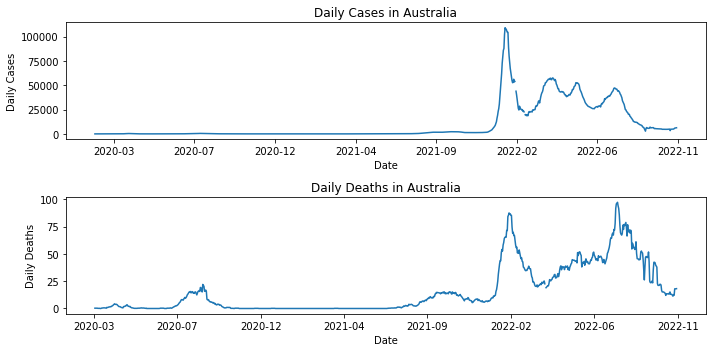

In [50]:
import matplotlib.dates as mdates

# create x-axis formatting
days = mdates.DayLocator(interval=140)
days_fmt = mdates.DateFormatter('%Y-%m')

# create plot
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 5))

ax1.xaxis.set_major_locator(days)
ax1.xaxis.set_major_formatter(days_fmt)

ax1.plot(df_clean['date'], df_clean['new_cases_smoothed'])
ax1.set_title('Daily Cases in Australia')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Cases')

ax2.plot(df_clean['date'], df_clean['new_deaths_smoothed'])
ax2.set_title('Daily Deaths in Australia')
ax2.set_xlabel('Date')
ax2.set_ylabel('Daily Deaths')

# apply x-axis formatting
ax2.xaxis.set_major_locator(days)
ax2.xaxis.set_major_formatter(days_fmt)

# display plot
plt.tight_layout()

It could be seen that the peak of cases in Australia was 13 January 2022 and the peak of deaths was 31 July 2022. The timeframe for the peak of cases is associated with the spread of the **Omicron** variant in Australia. Hence, it can be inferred that this was the most infectious COVID-19 variant in the country. It is observed that the peak of deaths happened approximately 6 months later compared to the peak of cases. This means the peak of deaths and peak of cases happened at different waves/outbreaks.

### 3.2 Vaccination Data
Vaccinations started in Australia on 22 February 2021. This date is nearly one year before the peak of the pandemic was reached. This means Australia started vaccinations early and that likely contributed to the country's success in handling the pandemic. Due to early vaccinations, we cannot see the number of cases or deaths going down as a result of vaccination; however, the peaks could have been a lot higher and the impacts of the outbreak worse if vaccinations did not start early.

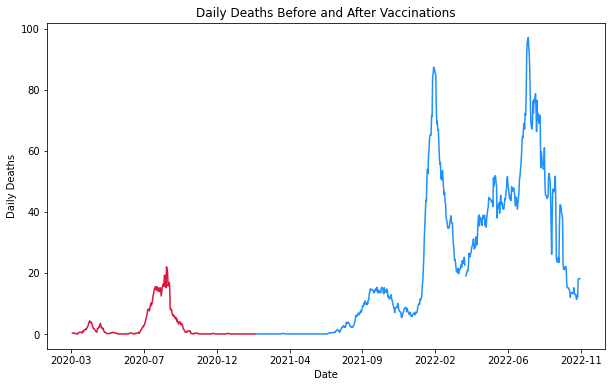

In [51]:
# separate dates
before_vax = df_clean[df_clean['date'] < '2021-02-22']
after_vax = df_clean[df_clean['date'] >= '2021-02-22']

# create plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Daily Deaths Before and After Vaccinations')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Deaths')

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_fmt)

ax.plot(before_vax['date'], before_vax['new_deaths_smoothed'], color='crimson')
ax.plot(after_vax['date'], after_vax['new_deaths_smoothed'], color='dodgerblue')

In [52]:
# get maximum daily deaths in Australia
print(f'Maximum Daily Deaths in Australia: {df_clean.new_deaths.max()}')

Maximum Daily Deaths in Australia: 187.0


### 3.3 Brief Look at the Pandemic Worldwide
Up to this point we saw the pandemic data with regards to Australia, but it's also interesting to compare it to the rest of the world.

Here we can see that Australia, or more broadly, Oceania was quite lucky in this pandemic for having the least amount of cases per million people.

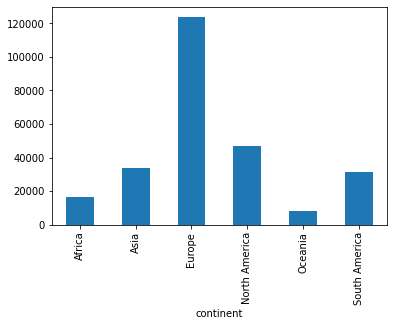

In [53]:
# plotting deaths per continent
df_today = df.loc[df.date == '2022-11-07']
df_today.groupby('continent')['total_deaths_per_million'].sum().plot(kind='bar')

Exploring data from different countries, we can see that Brazil demonstrated a negative correlation between total vaccinations and the number of daily deaths. 

-0.7598661970262769


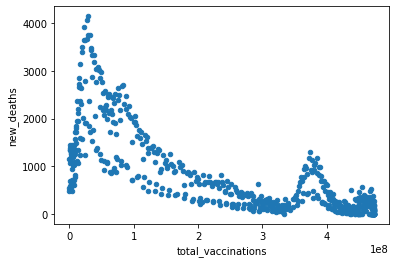

In [54]:
df_bra = df[df.iso_code == 'BRA'].copy()

df_bra.plot.scatter(x='total_vaccinations', y='new_deaths')

print(df_bra.total_vaccinations.corr(df_bra.new_deaths))

Below, we can see that HDI (Human Development Index) and GDP per capita don't have strong correlations with the total number of deaths per million people up to today. This means the pandemic was tragic regardless of the socioeconomic scenario of a country.

Correlation Coefficient [HDI x Deaths]:			 0.5748323206652127
Correlation Coefficient [GDP / Capita x Deaths]:	 0.22499187783798652


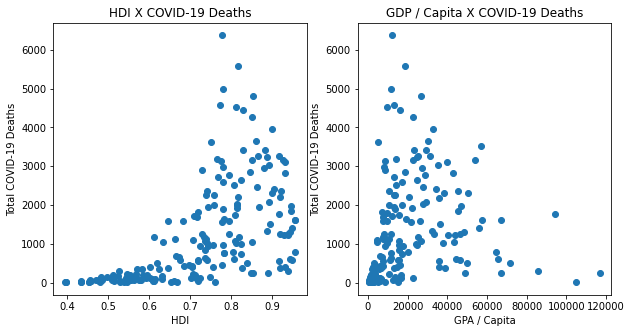

In [55]:
# set formatting for plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title("HDI X COVID-19 Deaths")
ax1.set_xlabel("HDI")
ax1.set_ylabel("Total COVID-19 Deaths")

ax2.set_title("GDP / Capita X COVID-19 Deaths")
ax2.set_xlabel("GPA / Capita")
ax2.set_ylabel("Total COVID-19 Deaths")

# scatter plot
ax1.scatter(x='human_development_index', y='total_deaths_per_million', data=df_today)
ax2.scatter(x='gdp_per_capita', y='total_deaths_per_million', data=df_today)

# calculate correlation coefficients
hdi_corr = df_today.human_development_index.corr(df_today.total_deaths_per_million)
gdp_corr = df_today.gdp_per_capita.corr(df_today.total_deaths_per_million)

print("Correlation Coefficient [HDI x Deaths]:\t\t\t", hdi_corr)
print("Correlation Coefficient [GDP / Capita x Deaths]:\t", gdp_corr)


## **4.0 Conclusion**

Finally, through this analysis we could see how well Australia handled the COVID-19 pandemic when compared to other countries. In general, the whole continent of Oceania experienced less cases/deaths per million than all other continents. We could also see how early Australia started vaccinations and how the peak of the pandemic came a long time afterwards. This is could be due to initially tougher lockdown restrictions, compared to easement of restrictions when vaccination rates went up.

We could also see how economic indicators did not correlate with the total number of deaths per million globally. In my personal view, this shows us how biological hazards can affect humanity as a whole. Despite our differences, we should remain united and always help each other in times of difficulty!